In [86]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage



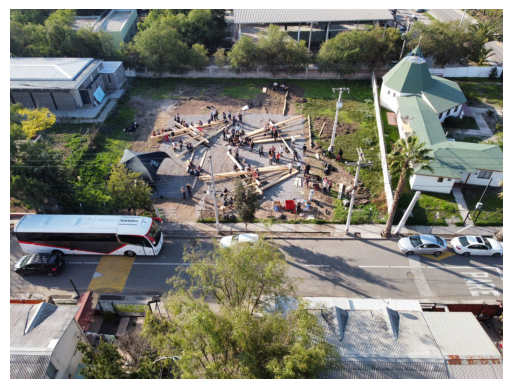

In [88]:
# Ruta relativa a la imagen en la carpeta 'data'
image_path = '../data/Imagen_L2_ML.jpg'  # Ajusta la ruta si es necesario
image = Image.open(image_path)

# Mostrar la imagen
plt.imshow(image)
plt.axis('off')  # No mostrar los ejes
plt.show()

Convertimos la imagen en matriz de pixeles: toma la imagen y la convierte en una matriz 2D de píxeles, cada uno representado por valores RGB.

In [90]:
# Convertir la imagen a una matriz de píxeles
image_np = np.array(image)
pixels = image_np.reshape(-1, 3)

# Mostrar las formas
print(f"Forma original de la imagen: {image_np.shape}")
print(f"Forma de la imagen convertida en píxeles: {pixels.shape}")


Forma original de la imagen: (1200, 1600, 3)
Forma de la imagen convertida en píxeles: (1920000, 3)


# 1) Aplicamos k-means:

## *Probamos con 6 clusters y vemos que la "intertia" se da en el 3.*

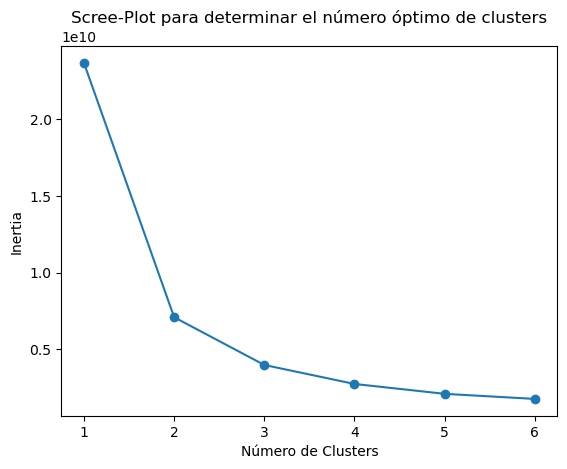

In [92]:
# Probar diferentes números de clusters y calcular la "inertia" (distancia intracluster)
inertia = []
cluster_range = range(1, 7)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    inertia.append(kmeans.inertia_)

# Graficar el scree-plot
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Scree-Plot para determinar el número óptimo de clusters')
plt.show()


## *Probamos con 5 clusters y vemos que la "intertia" se da en el 2.*

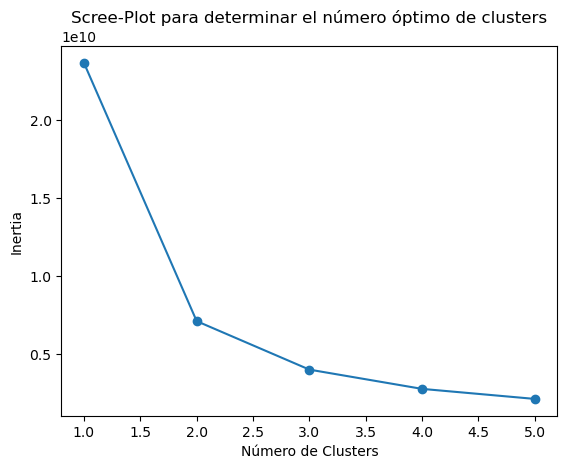

In [93]:
# Probar diferentes números de clusters y calcular la "inertia" (distancia intracluster)
inertia = []
cluster_range = range(1, 6)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    inertia.append(kmeans.inertia_)

# Graficar el scree-plot
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Scree-Plot para determinar el número óptimo de clusters')
plt.show()


## *Probamos con 3 clusters y vemos que la "intertia" se da en el 2.*

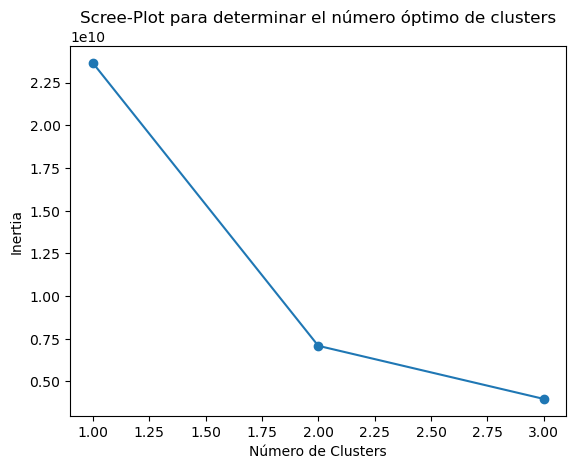

In [94]:
# Probar diferentes números de clusters y calcular la "inertia" (distancia intracluster)
inertia = []
cluster_range = range(1, 4)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    inertia.append(kmeans.inertia_)

# Graficar el scree-plot
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Scree-Plot para determinar el número óptimo de clusters')
plt.show()


Decidimos finalmente aplicar K-means con 3 clusters para reducir la paleta de colores de la imagen. Luego procederemos con el clustering jerárquico y las mezclas de gaussianas.

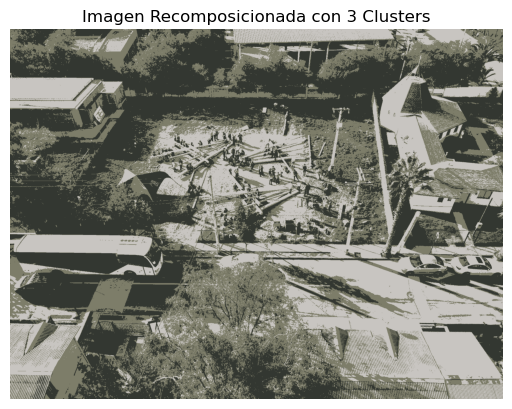

In [100]:
# Aplicar KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pixels)

# Obtener los colores (centroides) de los clusters
centroids = np.array(kmeans.cluster_centers_, dtype='uint8')

# Asignar cada píxel a su color más cercano (cluster)
labels = kmeans.labels_

# Recomponer la imagen con los colores reducidos (3 clusters)
reconstructed_image = centroids[labels].reshape(image_np.shape)

# Mostrar la imagen recomposicionada
plt.imshow(reconstructed_image)
plt.axis('off')  # No mostrar los ejes
plt.title('Imagen Recomposicionada con 3 Clusters')
plt.show()


### *Probamos comparación de las 3 opciones analizadas*

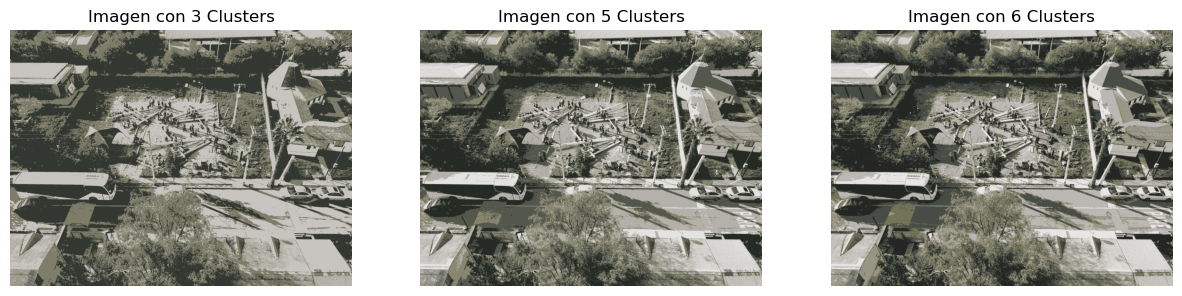

In [72]:
# Función para aplicar KMeans y recomponer la imagen con un número dado de clusters
def apply_kmeans_and_reconstruct(n_clusters, pixels, image_shape):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pixels)
    centroids = np.array(kmeans.cluster_centers_, dtype='uint8')
    labels = kmeans.labels_
    reconstructed_image = centroids[labels].reshape(image_shape)
    return reconstructed_image

# Aplicar KMeans para 3, 5 y 6 clusters
image_3_clusters = apply_kmeans_and_reconstruct(3, pixels, image_np.shape)
image_5_clusters = apply_kmeans_and_reconstruct(5, pixels, image_np.shape)
image_6_clusters = apply_kmeans_and_reconstruct(6, pixels, image_np.shape)

# Mostrar las imágenes recompuestas para comparar visualmente
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_3_clusters)
plt.axis('off')
plt.title('Imagen con 3 Clusters')

plt.subplot(1, 3, 2)
plt.imshow(image_5_clusters)
plt.axis('off')
plt.title('Imagen con 5 Clusters')

plt.subplot(1, 3, 3)
plt.imshow(image_6_clusters)
plt.axis('off')
plt.title('Imagen con 6 Clusters')

plt.show()


Este scree-plot muestra un cambio de dirección notorio al rededor de 3 clusters. Esto confirma que 3 sería un buen número para agregar colores para recomponer la imagen. Si agregamos más clusters no reduciría variablemente la variabilidad.

# 2) Clustering Jerárquico: 
#### Aplicar este algoritmo para encontrar agrupaciones en los datos basadas en una jerarquía de similitudes entre puntos (Para agrupar los píxeles similares).

In [116]:
# Reducir la resolución de la imagen para evitar problemas de memoria
image = image.resize((300, 300))  # Cambiar a una resolución más manejable (300x300 píxeles)

# Convertir la imagen a un array de numpy y normalizar los valores
data = np.array(image) / 255.0
original_shape = data.shape

# Aplanar los píxeles de la imagen (de 2D a 1D)
pixels = data.reshape(-1, 3)

# Aplicar Clustering Jerárquico
n_clusters = 10  # Puedes ajustar este valor según cuántos colores quieras en la imagen final
clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering.fit_predict(pixels)

# Obtener los colores medios para cada cluster
colors = np.array([pixels[labels == i].mean(axis=0) for i in range(n_clusters)])

# Asignar los nuevos colores a los píxeles
new_image_pixels = colors[labels].reshape(original_shape)

# Mostrar la imagen original y la nueva imagen con colores reducidos
plt.figure(figsize=(10, 5))

# Imagen original
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(image)

# Imagen con reducción de colores
plt.subplot(1, 2, 2)
plt.title(f"Imagen con {n_clusters} colores")
plt.imshow(new_image_pixels)

plt.show()


MemoryError: unable to allocate array data.